# Patient Survival Pradiction
### Rana Karmakar
#### National Skill Trainng Institute, Bhubaneswar
The predictors of in-hospital mortality for admitted patients remain poorly characterized. Aim is to develop and validate a prediction model for all-cause in-hospital mortality among admitted patients.
Dataset - https://www.kaggle.com/mitishaagarwal/patient
Date - 31/01/2022

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#!export KAGGLE_USERNAME="ranaslifestyle" && export KAGGLE_KEY="fee49541cef36b609a252e86ff60e5c3" && kaggle datasets download -d mitishaagarwal/patient
#!unzip patient.zip

In [51]:
!ls

dataset.csv  patient.zip  sample_data


In [52]:
df = pd.read_csv("dataset.csv")

In [53]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,...,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,...,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,...,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,...,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,...,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,...,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [54]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,89812.000000,89812.000000,90676.000000,89812.000000,90835.000000,90998.000000,90719.000000,90479.000000,87605.000000,90998.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,84372.000000,84372.000000,85906.000000,85906.000000,82128.000000,82128.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,133.054686,116.549625,174.638023,114.380940,4.251594,3.934658,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,0.400829,0.164912,0.951715,1.288376,0.097148,1.560166,30.870502,0.358268,42.032412,15.106312,0.833496,0.468646,19.798379,13.317586,19.793743,13.341521,22.017346,17.115903,20.808358,15.679680,20.701171,15.701305,10.701973,5.064943,1.794181,10.030069,25.733259,20.67793,25.792453,20.705016,0.693287,0.745147,18.409190,16.363229,18.481826,16.422063,21.823704,20.279869,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,27.556986,26.510637,27.679751,26.623528,86.687955,38.273013,0.667355,0.579610,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.

In [55]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [56]:
df.shape

(91713, 85)

In [57]:
df.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
age                            float64
bmi                            float64
                                ...   
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Unnamed: 83                    float64
hospital_death                   int64
Length: 85, dtype: object

In [58]:
df.value_counts

<bound method DataFrame.value_counts of        encounter_id  patient_id  ...  Unnamed: 83  hospital_death
0             66154       25312  ...          NaN               0
1            114252       59342  ...          NaN               0
2            119783       50777  ...          NaN               0
3             79267       46918  ...          NaN               0
4             92056       34377  ...          NaN               0
...             ...         ...  ...          ...             ...
91708         91592       78108  ...          NaN               0
91709         66119       13486  ...          NaN               0
91710          8981       58179  ...          NaN               0
91711         33776      120598  ...          NaN               0
91712          1671       53612  ...          NaN               0

[91713 rows x 85 columns]>

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

# EDA

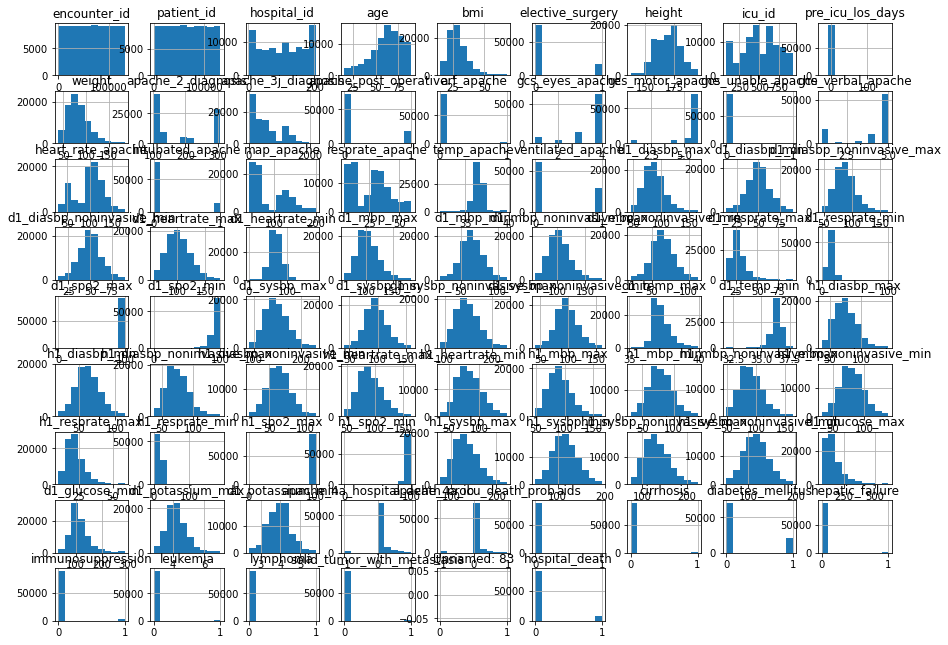

In [60]:
# plt.figure(figsize =(15, 9))
df.hist(figsize =(15, 11))
plt.show()

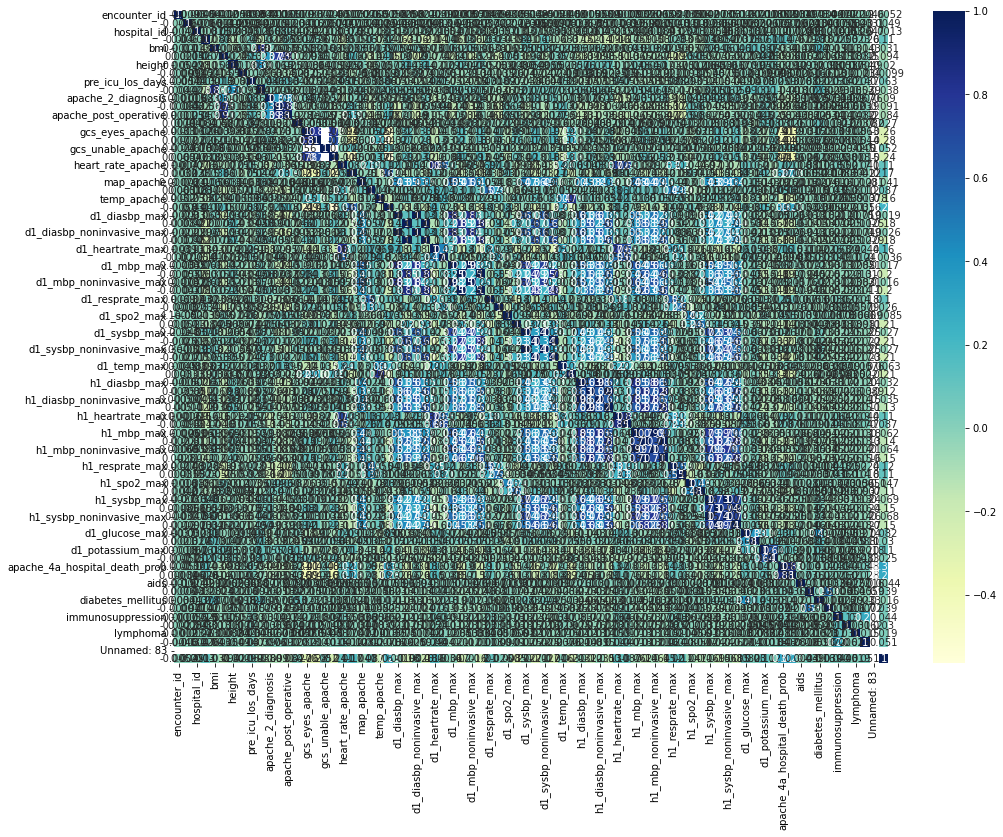

In [61]:
plt.figure(figsize=(16,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Data Preprossesing

In [62]:
df.isnull().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

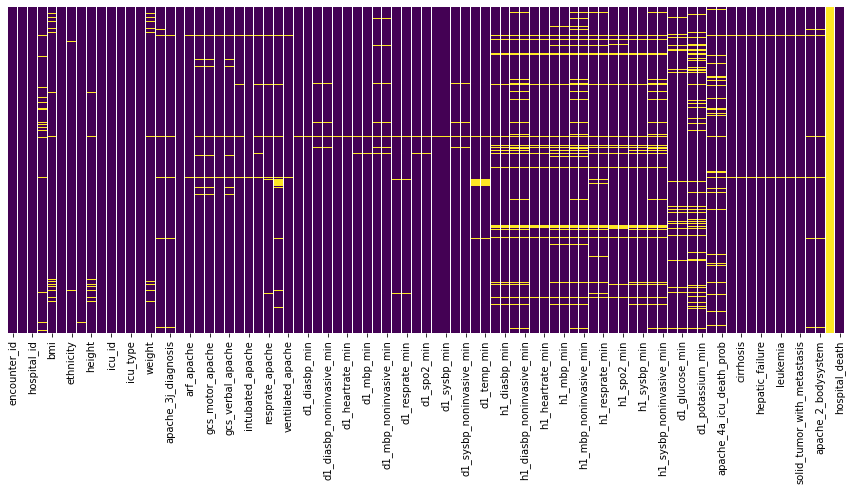

In [63]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [64]:
# Drop Unwanted Columns 
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [65]:
df.drop(columns=["encounter_id","patient_id","hospital_id"], inplace=True, axis =1)
df.shape

(91713, 81)

In [66]:
df.gcs_unable_apache.value_counts()

0.0    89812
1.0      864
Name: gcs_unable_apache, dtype: int64

In [67]:
df.drop(columns=["gcs_unable_apache"],inplace=True)

# Removing Duplicates

In [68]:
df.drop_duplicates(inplace = True)
df.shape

(91713, 80)

In [69]:
df.isna().sum()

age                            4228
bmi                            3429
elective_surgery                  0
ethnicity                      1395
gender                           25
                               ... 
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 80, dtype: int64

In [70]:
# Null Values Treatment - Forword Filling
df.fillna(method='ffill', inplace = True)

In [71]:
df.isnull().sum()

age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 80, dtype: int64

In [72]:
df.shape

(91713, 80)

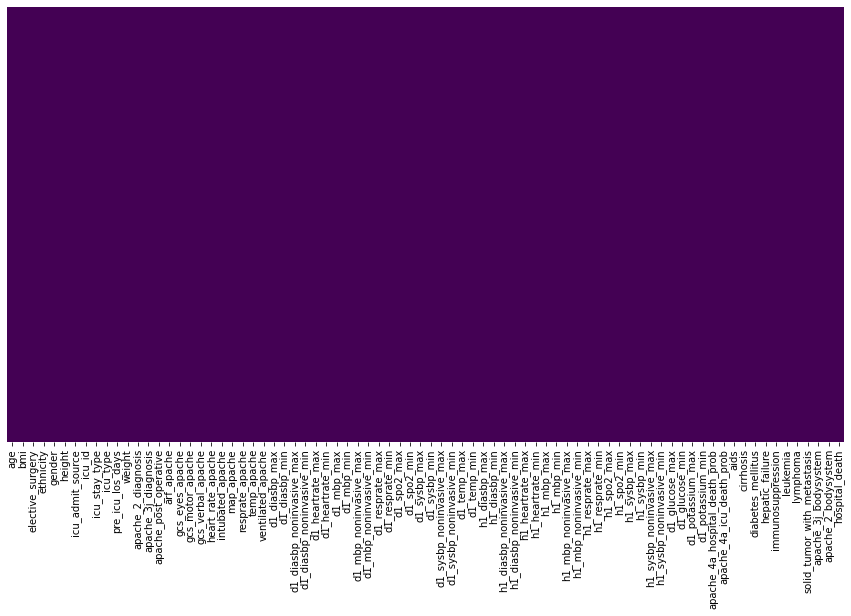

In [73]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [74]:
for i in df:
  print("---------------------------------------------------------")
  print(i)
  print("---------------------------------------------------------")
  print(df[i].unique())

---------------------------------------------------------
age
---------------------------------------------------------
[68. 77. 25. 81. 19. 67. 59. 70. 45. 50. 72. 80. 48. 65. 78. 30. 46. 39.
 79. 58. 87. 60. 85. 76. 53. 71. 82. 52. 75. 64. 55. 73. 88. 84. 62. 56.
 38. 41. 35. 54. 74. 49. 86. 51. 63. 61. 47. 33. 89. 36. 69. 57. 22. 83.
 66. 42. 27. 18. 17. 37. 43. 28. 40. 20. 32. 34. 23. 44. 24. 26. 31. 29.
 21. 16.]
---------------------------------------------------------
bmi
---------------------------------------------------------
[22.73       27.42       31.95       ... 33.81054776 45.93520298
 47.17967094]
---------------------------------------------------------
elective_surgery
---------------------------------------------------------
[0 1]
---------------------------------------------------------
ethnicity
---------------------------------------------------------
['Caucasian' 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
---------------------------

# Outlires Treatment

In [75]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  age
capping the  bmi
capping the  elective_surgery
capping the  ethnicity
capping the  gender
capping the  height
capping the  icu_admit_source
capping the  icu_id
capping the  icu_stay_type
capping the  icu_type
capping the  pre_icu_los_days
capping the  weight
capping the  apache_2_diagnosis
capping the  apache_3j_diagnosis
capping the  apache_post_operative
capping the  arf_apache
capping the  gcs_eyes_apache
capping the  gcs_motor_apache
capping the  gcs_verbal_apache
capping the  heart_rate_apache
capping the  intubated_apache
capping the  map_apache
capping the  resprate_apache
capping the  temp_apache
capping the  ventilated_apache
capping the  d1_diasbp_max


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  d1_diasbp_min
capping the  d1_diasbp_noninvasive_max
capping the  d1_diasbp_noninvasive_min
capping the  d1_heartrate_max
capping the  d1_heartrate_min
capping the  d1_mbp_max
capping the  d1_mbp_min
capping the  d1_mbp_noninvasive_max
capping the  d1_mbp_noninvasive_min
capping the  d1_resprate_max
capping the  d1_resprate_min
capping the  d1_spo2_max
capping the  d1_spo2_min
capping the  d1_sysbp_max
capping the  d1_sysbp_min
capping the  d1_sysbp_noninvasive_max
capping the  d1_sysbp_noninvasive_min
capping the  d1_temp_max
capping the  d1_temp_min
capping the  h1_diasbp_max
capping the  h1_diasbp_min
capping the  h1_diasbp_noninvasive_max
capping the  h1_diasbp_noninvasive_min
capping the  h1_heartrate_max
capping the  h1_heartrate_min
capping the  h1_mbp_max
capping the  h1_mbp_min
capping the  h1_mbp_noninvasive_max
capping the  h1_mbp_noninvasive_min
capping the  h1_resprate_max
capping the  h1_resprate_min
capping the  h1_spo2_max
capping the  h1_spo2_min
capping t

In [76]:
df = final_df

In [77]:
df.shape

(91713, 80)

In [78]:
for i in df.columns:
    print(i)
    print("~~~~~~~~")
    print(df[i].unique())

age
~~~~~~~~
[68. 77. 25. 81. 20. 67. 59. 70. 45. 50. 72. 80. 48. 65. 78. 30. 46. 39.
 79. 58. 87. 60. 85. 76. 53. 71. 82. 52. 75. 64. 55. 73. 88. 84. 62. 56.
 38. 41. 35. 54. 74. 49. 86. 51. 63. 61. 47. 33. 89. 36. 69. 57. 22. 83.
 66. 42. 27. 37. 43. 28. 40. 32. 34. 23. 44. 24. 26. 31. 29. 21.]
bmi
~~~~~~~~
[22.73       27.42       31.95       ... 33.81054776 45.93520298
 47.17967094]
elective_surgery
~~~~~~~~
[0 1]
ethnicity
~~~~~~~~
['Caucasian' 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
gender
~~~~~~~~
['M' 'F']
height
~~~~~~~~
[180.3  160.   172.7  165.1  188.   190.5  165.   170.2  175.3  154.9
 193.   167.6  177.8  162.6  152.4  149.9  182.9  162.5  151.8  157.5
 185.4  161.3  167.5  166.4  157.4  170.   183.   182.8  154.3  175.2
 167.   163.8  179.1  173.   171.5  151.1  187.9  144.8  158.   189.2
 168.9  149.   180.   152.   182.   175.   177.   176.5  167.7  149.8
 147.3  156.2  174.   150.   163.   154.2  179.   157.7  157.   178.
 185.   153

# Dummy Encoding

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
# Columns need to be encoded
data=df[["elective_surgery", "ethnicity", "gender", "icu_admit_source", "icu_stay_type",
 "icu_type", "apache_post_operative", "arf_apache", "gcs_eyes_apache", "gcs_motor_apache",
"gcs_verbal_apache", "intubated_apache", "ventilated_apache", "aids", "cirrhosis", "diabetes_mellitus", 
"hepatic_failure", "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis", "apache_3j_bodysystem",
"apache_2_bodysystem"]]

In [81]:
encoded_data = pd.get_dummies(df, columns = ["elective_surgery", "ethnicity", "gender", "icu_admit_source", "icu_stay_type",
 "icu_type", "apache_post_operative", "arf_apache", "gcs_eyes_apache", "gcs_motor_apache",
"gcs_verbal_apache", "intubated_apache", "ventilated_apache", "aids", "cirrhosis", "diabetes_mellitus", 
"hepatic_failure", "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis", "apache_3j_bodysystem",
"apache_2_bodysystem"])

In [82]:
encoded_data.shape

(91713, 140)

In [83]:
x = encoded_data.drop(columns=["hospital_death"])
y = encoded_data["hospital_death"]

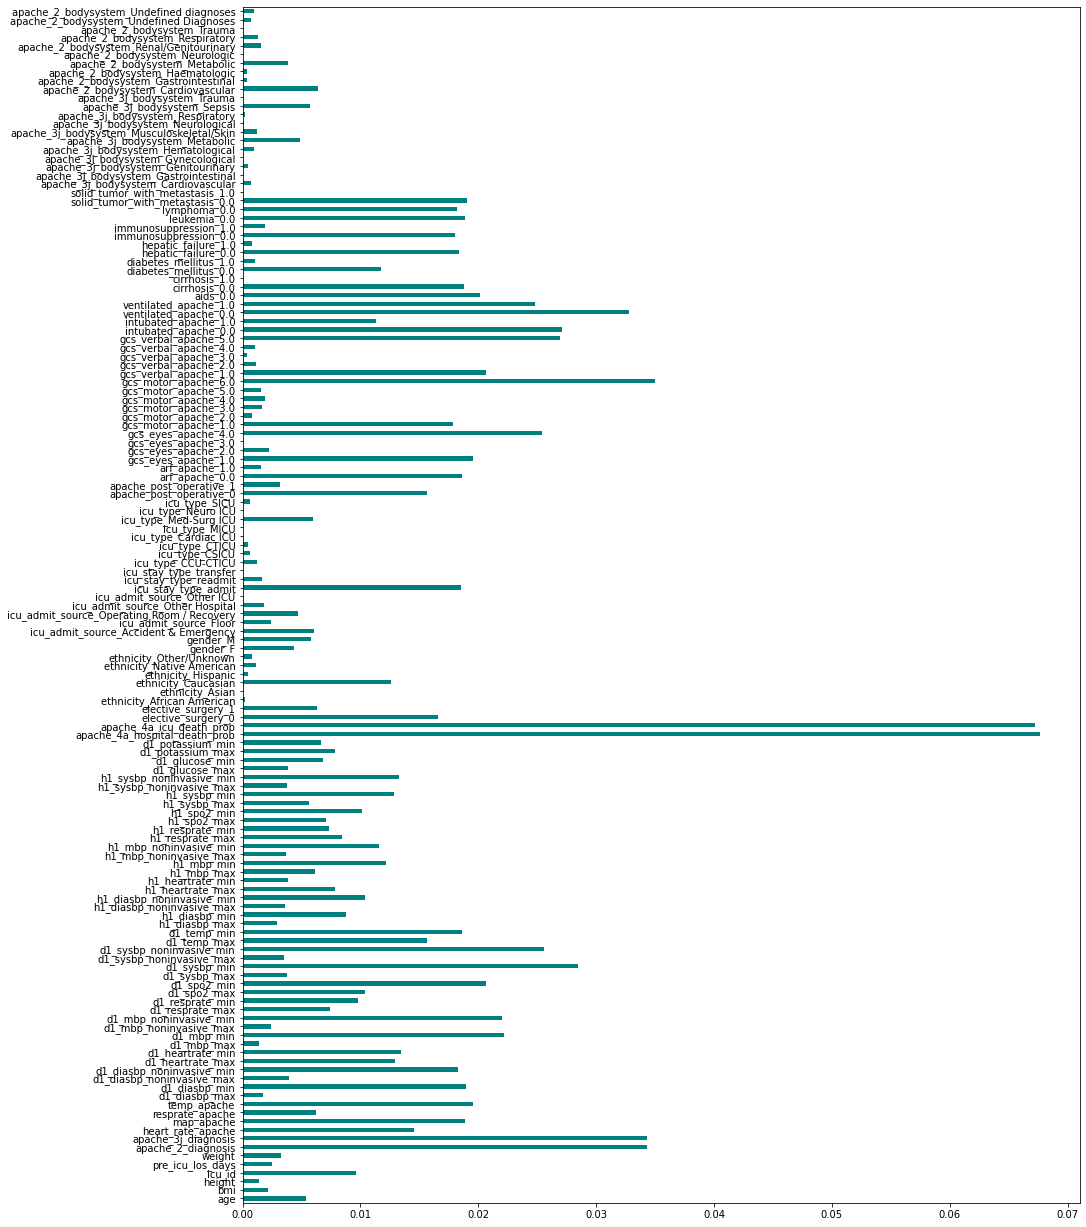

<Figure size 1080x1584 with 0 Axes>

In [84]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(x,y)
feat_importance = pd.Series(importance, x.columns[0: len(x.columns)])
feat_importance.plot(kind='barh', color='teal', figsize=(15, 22))
plt.figure(figsize=(15, 22))
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(x,y)

In [113]:
feat_importance = pd.Series(importance, x.columns[0: len(x.columns)])
fet = feat_importance > 0.004
print(fet)

age                                         True
bmi                                        False
height                                     False
icu_id                                      True
pre_icu_los_days                           False
                                           ...  
apache_2_bodysystem_Renal/Genitourinary    False
apache_2_bodysystem_Respiratory            False
apache_2_bodysystem_Trauma                 False
apache_2_bodysystem_Undefined Diagnoses    False
apache_2_bodysystem_Undefined diagnoses    False
Length: 139, dtype: bool


## Data Normalization

In [87]:
print("Standerd Daviation of X - ", x.std())
# print("Standard Daviation of X_test - ",x_test.std())

Standerd Daviation of X -  age                                         16.731891
bmi                                          8.020118
height                                      10.633941
icu_id                                     228.778567
pre_icu_los_days                             1.784713
                                              ...    
apache_2_bodysystem_Renal/Genitourinary      0.162870
apache_2_bodysystem_Respiratory              0.335262
apache_2_bodysystem_Trauma                   0.202079
apache_2_bodysystem_Undefined Diagnoses      0.061570
apache_2_bodysystem_Undefined diagnoses      0.200143
Length: 139, dtype: float64


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
print("After Standarization X - ", scaled_x.std())

After Standarization X -  0.9891497693408479


# Feature Selection - PCA

In [89]:
'''# Importing PCA
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 45)
pca.fit(scaled_x)
x_pca = pca.transform(scaled_x)
  
x_pca.shape'''

'# Importing PCA\nfrom sklearn.decomposition import PCA\n  \npca = PCA(n_components = 45)\npca.fit(scaled_x)\nx_pca = pca.transform(scaled_x)\n  \nx_pca.shape'

# Split Dataset - Train Test

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3)

In [91]:
print("X_train Shape -", x_train.shape)
print("X_test Shape -", x_test.shape)
print("Y_train Shape -", y_train.shape)
print("Y_test Shape -", y_test.shape)

X_train Shape - (64199, 139)
X_test Shape - (27514, 139)
Y_train Shape - (64199,)
Y_test Shape - (27514,)


# Model Building - Neural Network

In [92]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [93]:
model = Sequential()

In [94]:
model.add(Dense(130, input_dim=139, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [95]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=150, batch_size=64)

Epoch 1/150
1004/1004 [==============================] - 3s 3ms/step - loss: 0.2179 - accuracy: 0.9208
Epoch 2/150
1004/1004 [==============================] - 2s 2ms/step - loss: 0.1992 - accuracy: 0.9262
Epoch 3/150
1004/1004 [==============================] - 2s 2ms/step - loss: 0.1915 - accuracy: 0.9291
Epoch 4/150
1004/1004 [==============================] - 2s 2ms/step - loss: 0.1842 - accuracy: 0.9314
Epoch 5/150
1004/1004 [==============================] - 2s 2ms/step - loss: 0.1774 - accuracy: 0.9338
Epoch 6/150
1004/1004 [==============================] - 2s 2ms/step - loss: 0.1692 - accuracy: 0.9359
Epoch 7/150
1004/1004 [==============================] - 2s 2ms/step - loss: 0.1602 - accuracy: 0.9390
Epoch 8/150
1004/1004 [==============================] - 2s 2ms/step - loss: 0.1517 - accuracy: 0.9425
Epoch 9/150
1004/1004 [==============================] - 2s 2ms/step - loss: 0.1421 - accuracy: 0.9458
Epoch 10/150
1004/1004 [==============================] - 2s 2ms/step - l

# Model Evaluate

In [127]:
scores = model.evaluate(x_test, y_test)

860/860 [==============================] - 3s 3ms/step - loss: 1.3864 - accuracy: 0.9053


In [128]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.53%


In [98]:
pred = model.predict(x_test)
pred[:5]

array([[4.3368811e-15],
       [9.9918675e-01],
       [1.6278301e-14],
       [4.1562149e-18],
       [3.9999500e-19]], dtype=float32)

In [121]:
y_test[:5]

61237    0
13566    1
24873    0
44724    0
80372    0
Name: hospital_death, dtype: int64

In [133]:
y_pred = []
for element in pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print("Acctual Values - ", y_test[:6])
print("predicted Values -", y_pred[:6])

Acctual Values -  61237    0
13566    1
24873    0
44724    0
80372    0
296      0
Name: hospital_death, dtype: int64
predicted Values - [0, 1, 0, 0, 0, 0]


# Save The Model

In [130]:
model.save("Model_H5_Patient_Survival_Prediction.h5")

# Load The Model

In [131]:
from keras.models import load_model
model = load_model('Model_H5_Patient_Survival_Prediction.h5')

In [135]:
pred = model.predict(x_test)
y_pred = []
for element in pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print("Acctual Values - ", y_test[10:20])
print("predicted Values -", y_pred[10:20])

Acctual Values -  37681    1
67427    1
12840    0
90565    0
51476    0
54311    0
72735    0
37680    0
66678    0
38571    0
Name: hospital_death, dtype: int64
predicted Values - [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
